In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.metrics import accuracy_score
warnings.filterwarnings("ignore")
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv("/content/Company_Data.csv")
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [3]:
df.head()


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
#For three categories lets divide the Sales values with Quartiles , less than first quartile as Low , between Second Quartile as Medium and above Third Quartile as High
df.Sales.max()

16.270/3

5.423333333333333

In [5]:
5.423333333333333*2

10.846666666666666

In [6]:
5.423333333333333*3

16.27

In [7]:
df1=df.copy()
df1['Sales_cat'] = pd.cut(x = df1['Sales'], bins = [0,5.39,9.46,17], labels=['Low','Medium','High'], right = False)
df1.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_cat
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,High
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,High
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,Medium
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Low


In [8]:
df1.Sales_cat.value_counts()

Medium    209
Low       100
High       91
Name: Sales_cat, dtype: int64

<Axes: >

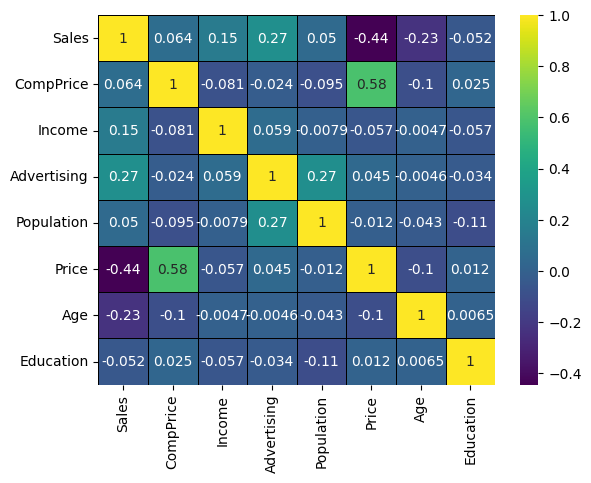

In [9]:
sns.heatmap(df.corr(), annot=True, fmt='.2g', cmap="viridis",  linewidths=0.5, linecolor='black')

<Figure size 800x800 with 0 Axes>

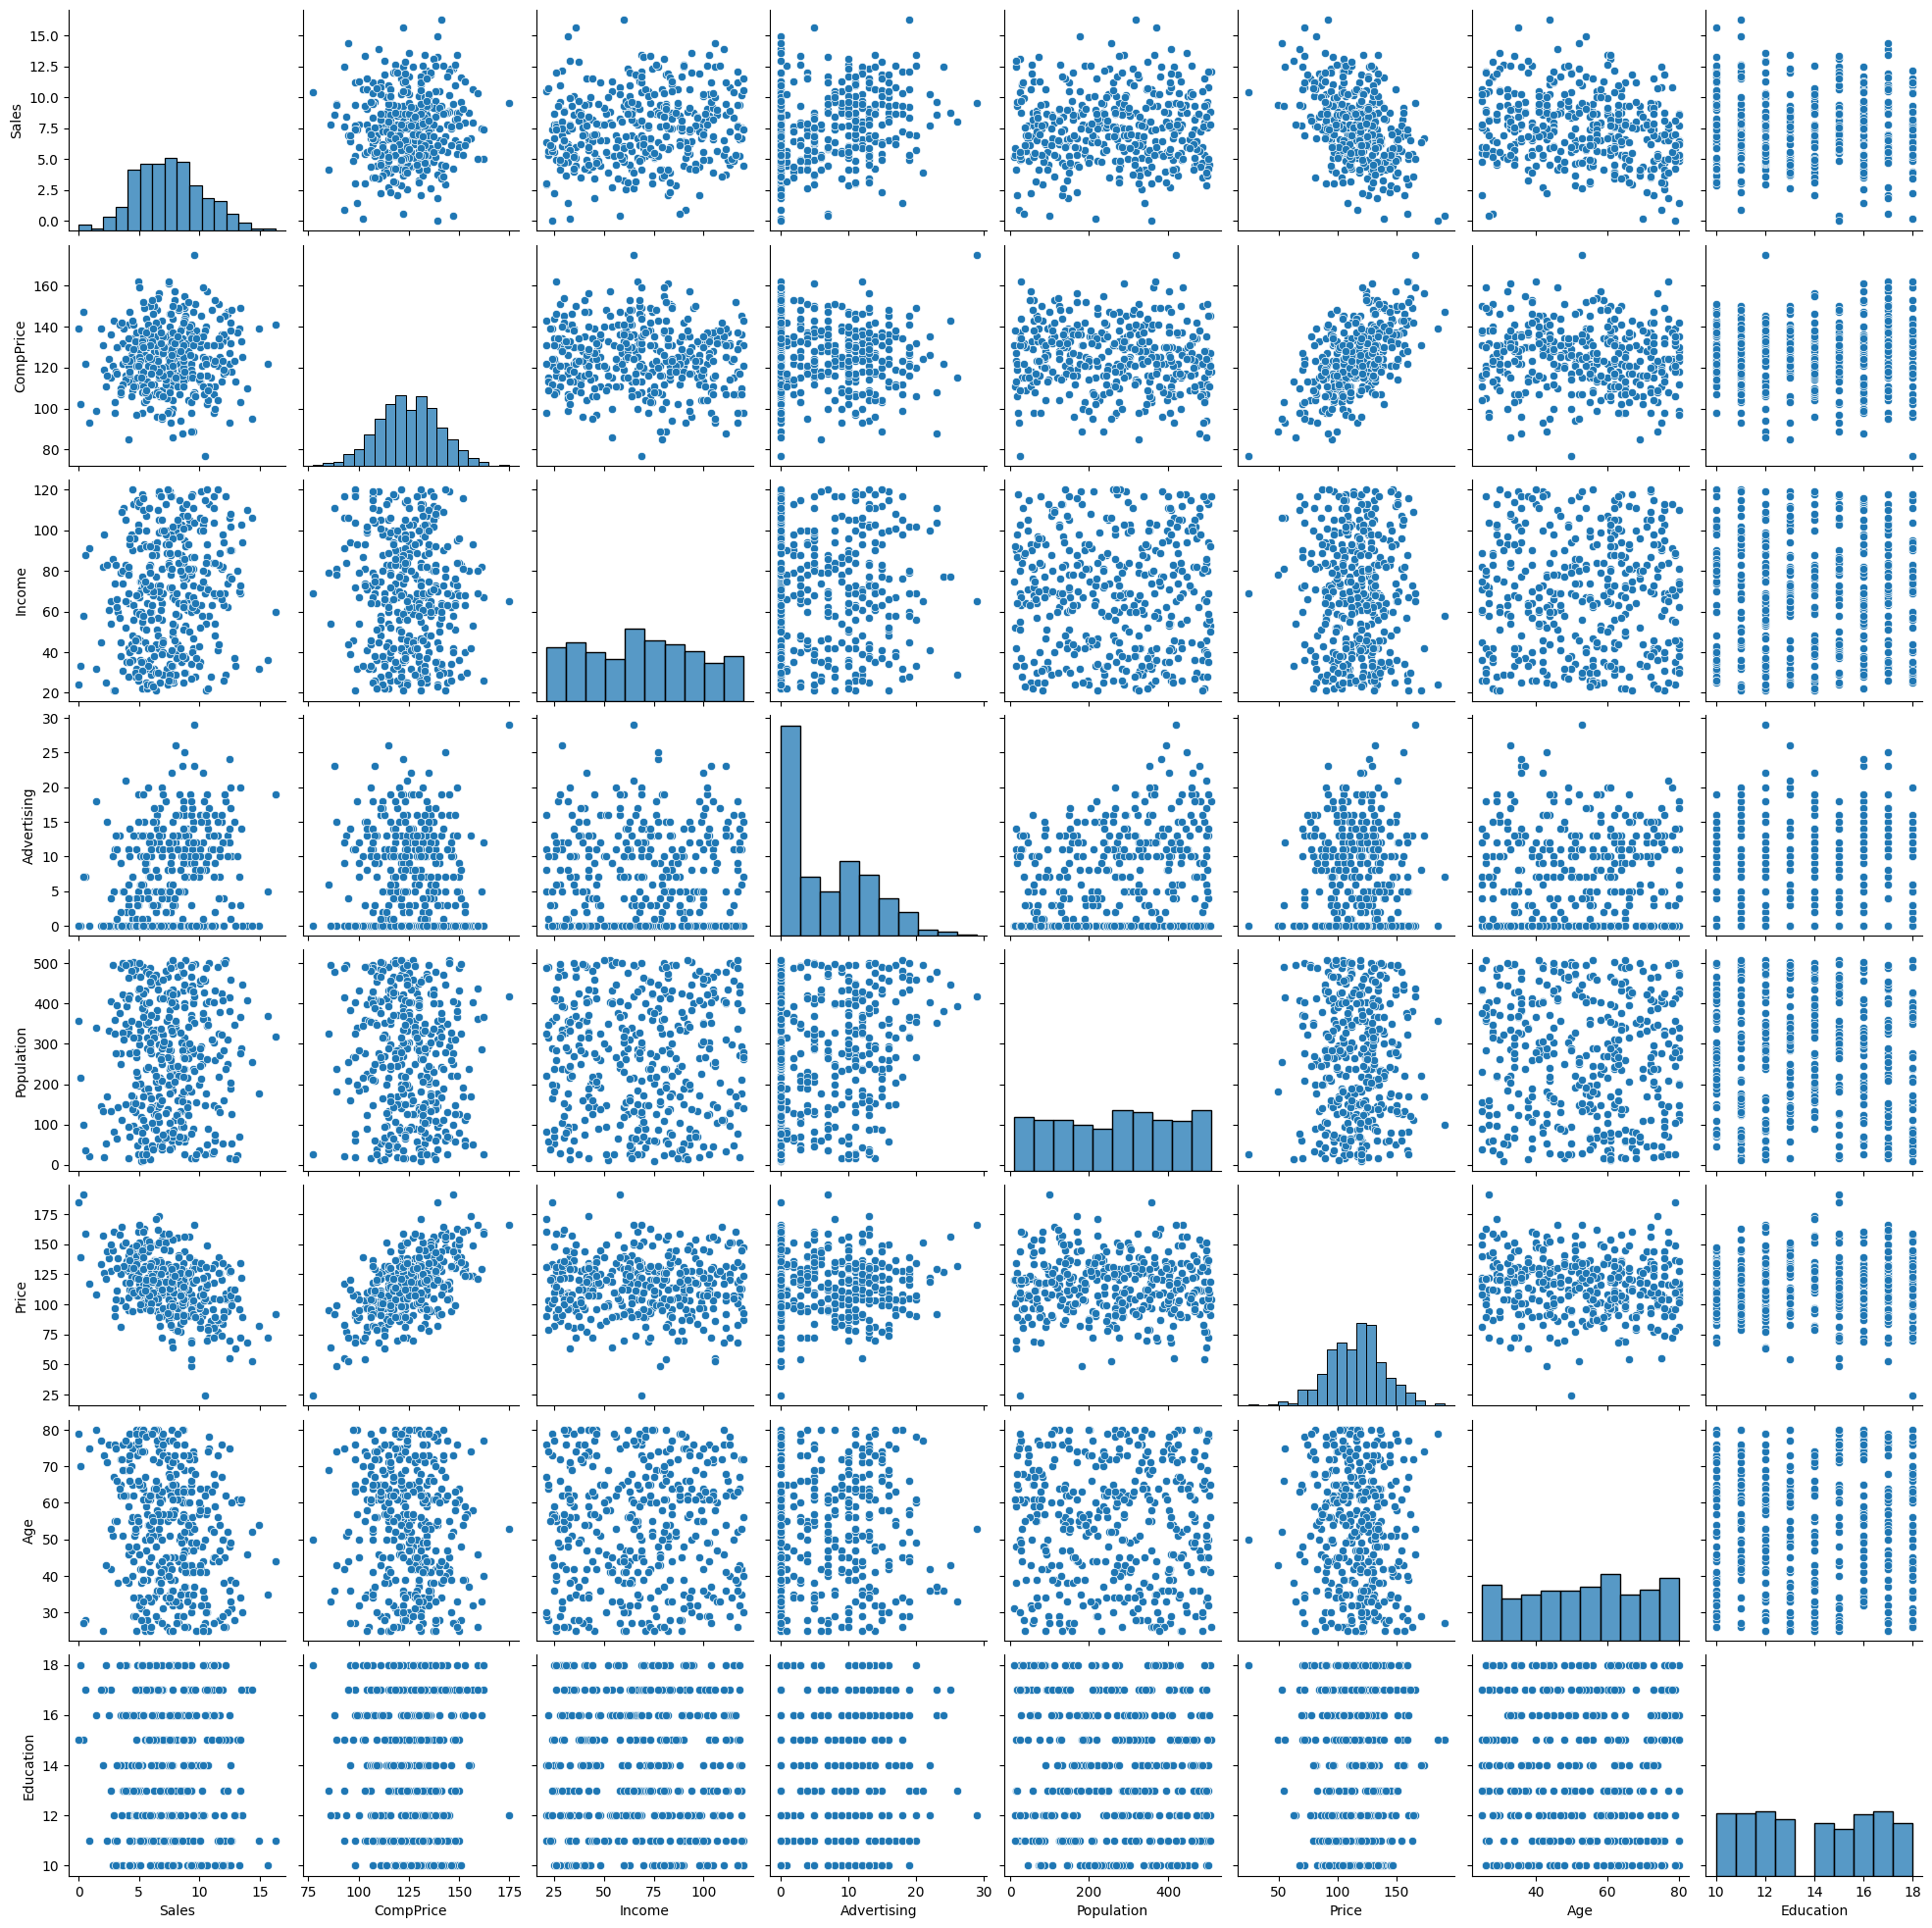

In [10]:
plt.figure(figsize=(8,8))
sns.pairplot(df, palette='Set1')
plt.show()

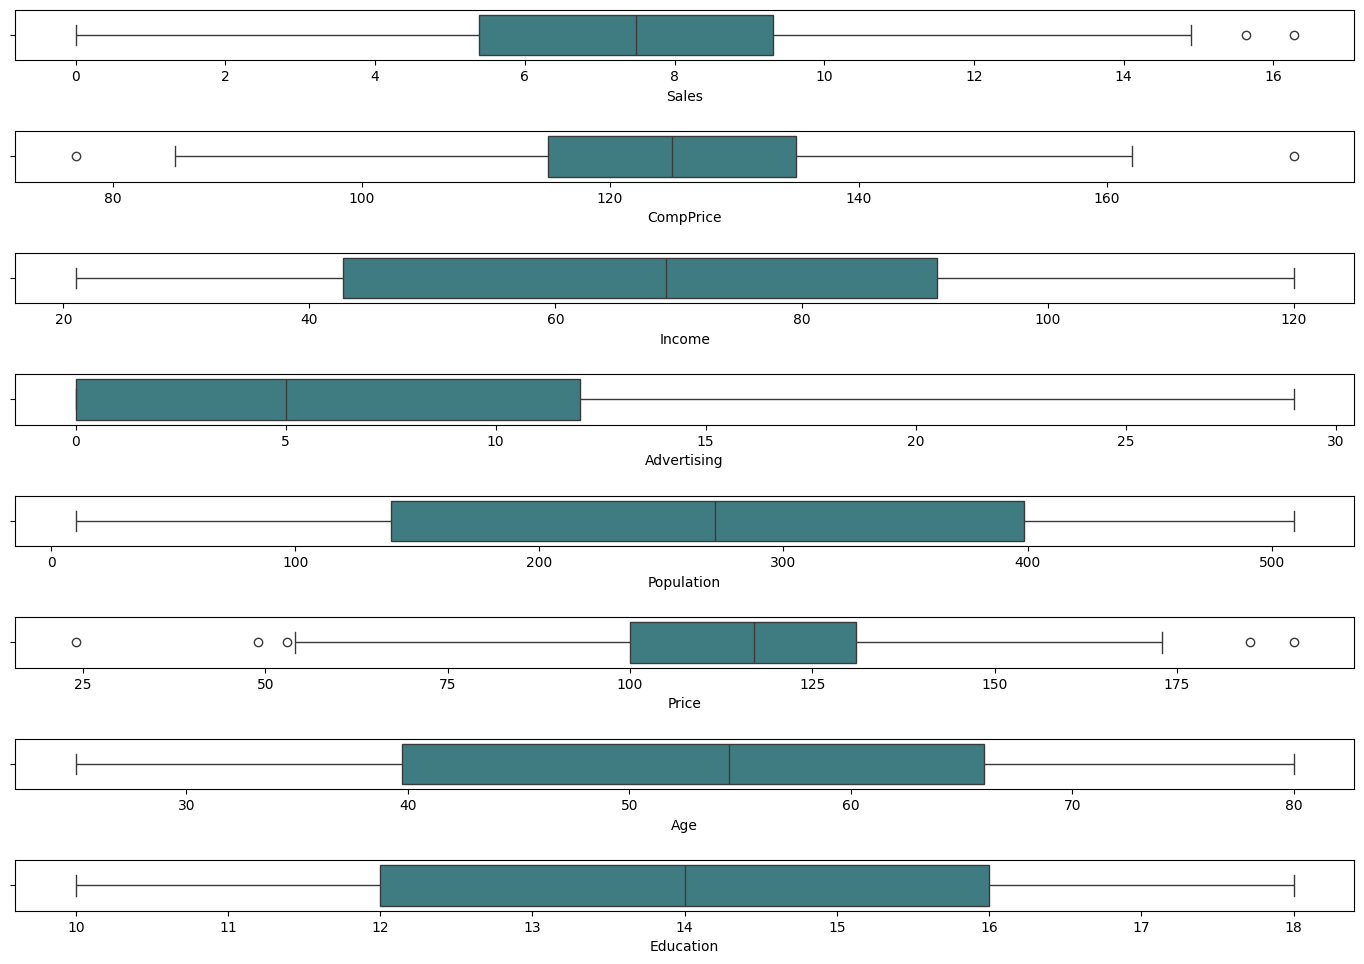

In [11]:
ot=df1.copy()
fig, axes=plt.subplots(8,1,figsize=(14,10),sharex=False,sharey=False)
sns.boxplot(x='Sales',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='CompPrice',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='Income',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='Advertising',data=ot,palette='crest',ax=axes[3])
sns.boxplot(x='Population',data=ot,palette='crest',ax=axes[4])
sns.boxplot(x='Price',data=ot,palette='crest',ax=axes[5])
sns.boxplot(x='Age',data=ot,palette='crest',ax=axes[6])
sns.boxplot(x='Education',data=ot,palette='crest',ax=axes[7])
plt.tight_layout(pad=2.0)

In [12]:
#Outliers
"""removing the ouliers"""
# List of column names with continuous variables
continuous_columns = [  "CompPrice" , "Price" ]
# Create a new DataFrame without outliers for each continuous column
data_without_outliers = df1.copy()
for columns in continuous_columns:
    Q1 = data_without_outliers[columns].quantile(0.25)
    Q3 = data_without_outliers[columns].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker_Length = Q1 - 1.5 * IQR
    upper_whisker_Length = Q3 + 1.5 * IQR
    data_without_outliers = data_without_outliers[(data_without_outliers[columns] >= lower_whisker_Length) & (data_without_outliers[columns]<= upper_whisker_Length)]
# Print the cleaned data without outliers
print(data_without_outliers)
df1 = data_without_outliers

     Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0     9.50        138      73           11         276    120       Bad   42   
1    11.22        111      48           16         260     83      Good   65   
2    10.06        113      35           10         269     80    Medium   59   
3     7.40        117     100            4         466     97    Medium   55   
4     4.15        141      64            3         340    128       Bad   38   
..     ...        ...     ...          ...         ...    ...       ...  ...   
395  12.57        138     108           17         203    128      Good   33   
396   6.14        139      23            3          37    120    Medium   55   
397   7.41        162      26           12         368    159    Medium   40   
398   5.94        100      79            7         284     95       Bad   50   
399   9.71        134      37            0          27    120      Good   49   

     Education Urban   US Sales_cat  
0

In [13]:
df1.drop("Sales",axis=1 ,inplace=True)

In [14]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

df1["ShelveLoc"]=LE.fit_transform(df1["ShelveLoc"])
df1["Urban"]=LE.fit_transform(df1["Urban"])
df1["US"]=LE.fit_transform(df1["US"])
df1["Sales_cat"]=LE.fit_transform(df1["Sales_cat"])

df1.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_cat
0,138,73,11,276,120,0,42,17,1,1,0
1,111,48,16,260,83,1,65,10,1,1,0
2,113,35,10,269,80,2,59,12,1,1,0
3,117,100,4,466,97,2,55,14,1,1,2
4,141,64,3,340,128,0,38,13,1,0,1


In [15]:
#Data Spliting

X=df1.iloc[:,0:10]
Y=df1[["Sales_cat"]]

In [16]:
# data partition
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test  = train_test_split(X,Y, test_size=0.30)


from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(max_depth=6)

DT.fit(X_train,Y_train) # Bo + b1x1 + B2x2
Y_pred_train = DT.predict(X_train)
Y_pred_test = DT.predict(X_test)
training_accuracy = accuracy_score(Y_train,Y_pred_train).round(3)
test_accuracy = accuracy_score(Y_test,Y_pred_test).round(3)

print(training_accuracy)
print(test_accuracy)

print("Number of Nodes",DT.tree_.node_count)
print("Level of Depth",DT.tree_.max_depth)


0.836
0.597
Number of Nodes 57
Level of Depth 6


In [17]:
# validation set method --> validaton hold-off method
training_accuracy = []
test_accuracy = []


DT = DecisionTreeClassifier(max_depth=6)


for i in range(1,101,1):
    X_train,X_test,Y_train,Y_test  = train_test_split(X,Y, test_size=0.30, random_state=i)
    DT.fit(X_train,Y_train)
    Y_pred_train = DT.predict(X_train)
    Y_pred_test = DT.predict(X_test)
    training_accuracy.append(accuracy_score(Y_train,Y_pred_train).round(3))
    test_accuracy.append(accuracy_score(Y_test,Y_pred_test).round(3))

import numpy as np
print("Average trianing accuray",np.mean(training_accuracy).round(2))
print("Average test accuray",np.mean(test_accuracy).round(2))


Average trianing accuray 0.86
Average test accuray 0.6


In [18]:
 clf_report = pd.DataFrame(classification_report(Y_train,Y_pred_train, output_dict=True))
 print(clf_report)

                   0          1           2  accuracy   macro avg  \
precision   0.896552   0.883333    0.866242  0.876364    0.882042   
recall      0.852459   0.803030    0.918919  0.876364    0.858136   
f1-score    0.873950   0.841270    0.891803  0.876364    0.869008   
support    61.000000  66.000000  148.000000  0.876364  275.000000   

           weighted avg  
precision      0.877067  
recall         0.876364  
f1-score       0.875715  
support      275.000000  


In [19]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators = 200, max_samples = 0.6, max_features=0.7,max_depth=5)
RF.fit(X_train,Y_train)

Y_pred_train = RF.predict(X_train)
Y_pred_test = RF.predict(X_test)
training_accuracy = accuracy_score(Y_train,Y_pred_train).round(3)
test_accuracy = accuracy_score(Y_test,Y_pred_test).round(3)

print(training_accuracy)
print(test_accuracy)


0.88
0.63


In [20]:
# validation set method --> validaton hold-off method
training_accuracy = []
test_accuracy = []

for i in range(1,101,1):
    X_train,X_test,Y_train,Y_test  = train_test_split(X,Y, test_size=0.30, random_state=i)
    RF.fit(X_train,Y_train)
    Y_pred_train = RF.predict(X_train)
    Y_pred_test = RF.predict(X_test)
    training_accuracy.append(accuracy_score(Y_train,Y_pred_train).round(3))
    test_accuracy.append(accuracy_score(Y_test,Y_pred_test).round(3))


import numpy as np
print("Average trianing accuray",np.mean(training_accuracy).round(2))
print("Average test accuray",np.mean(test_accuracy).round(2))


Average trianing accuray 0.87
Average test accuray 0.65


In [21]:
 clf_report = pd.DataFrame(classification_report(Y_train,Y_pred_train, output_dict=True))
 print(clf_report)

                   0          1           2  accuracy   macro avg  \
precision   1.000000   1.000000    0.795699  0.861818    0.931900   
recall      0.721311   0.681818    1.000000  0.861818    0.801043   
f1-score    0.838095   0.810811    0.886228  0.861818    0.845045   
support    61.000000  66.000000  148.000000  0.861818  275.000000   

           weighted avg  
precision      0.890049  
recall         0.861818  
f1-score       0.857451  
support      275.000000  


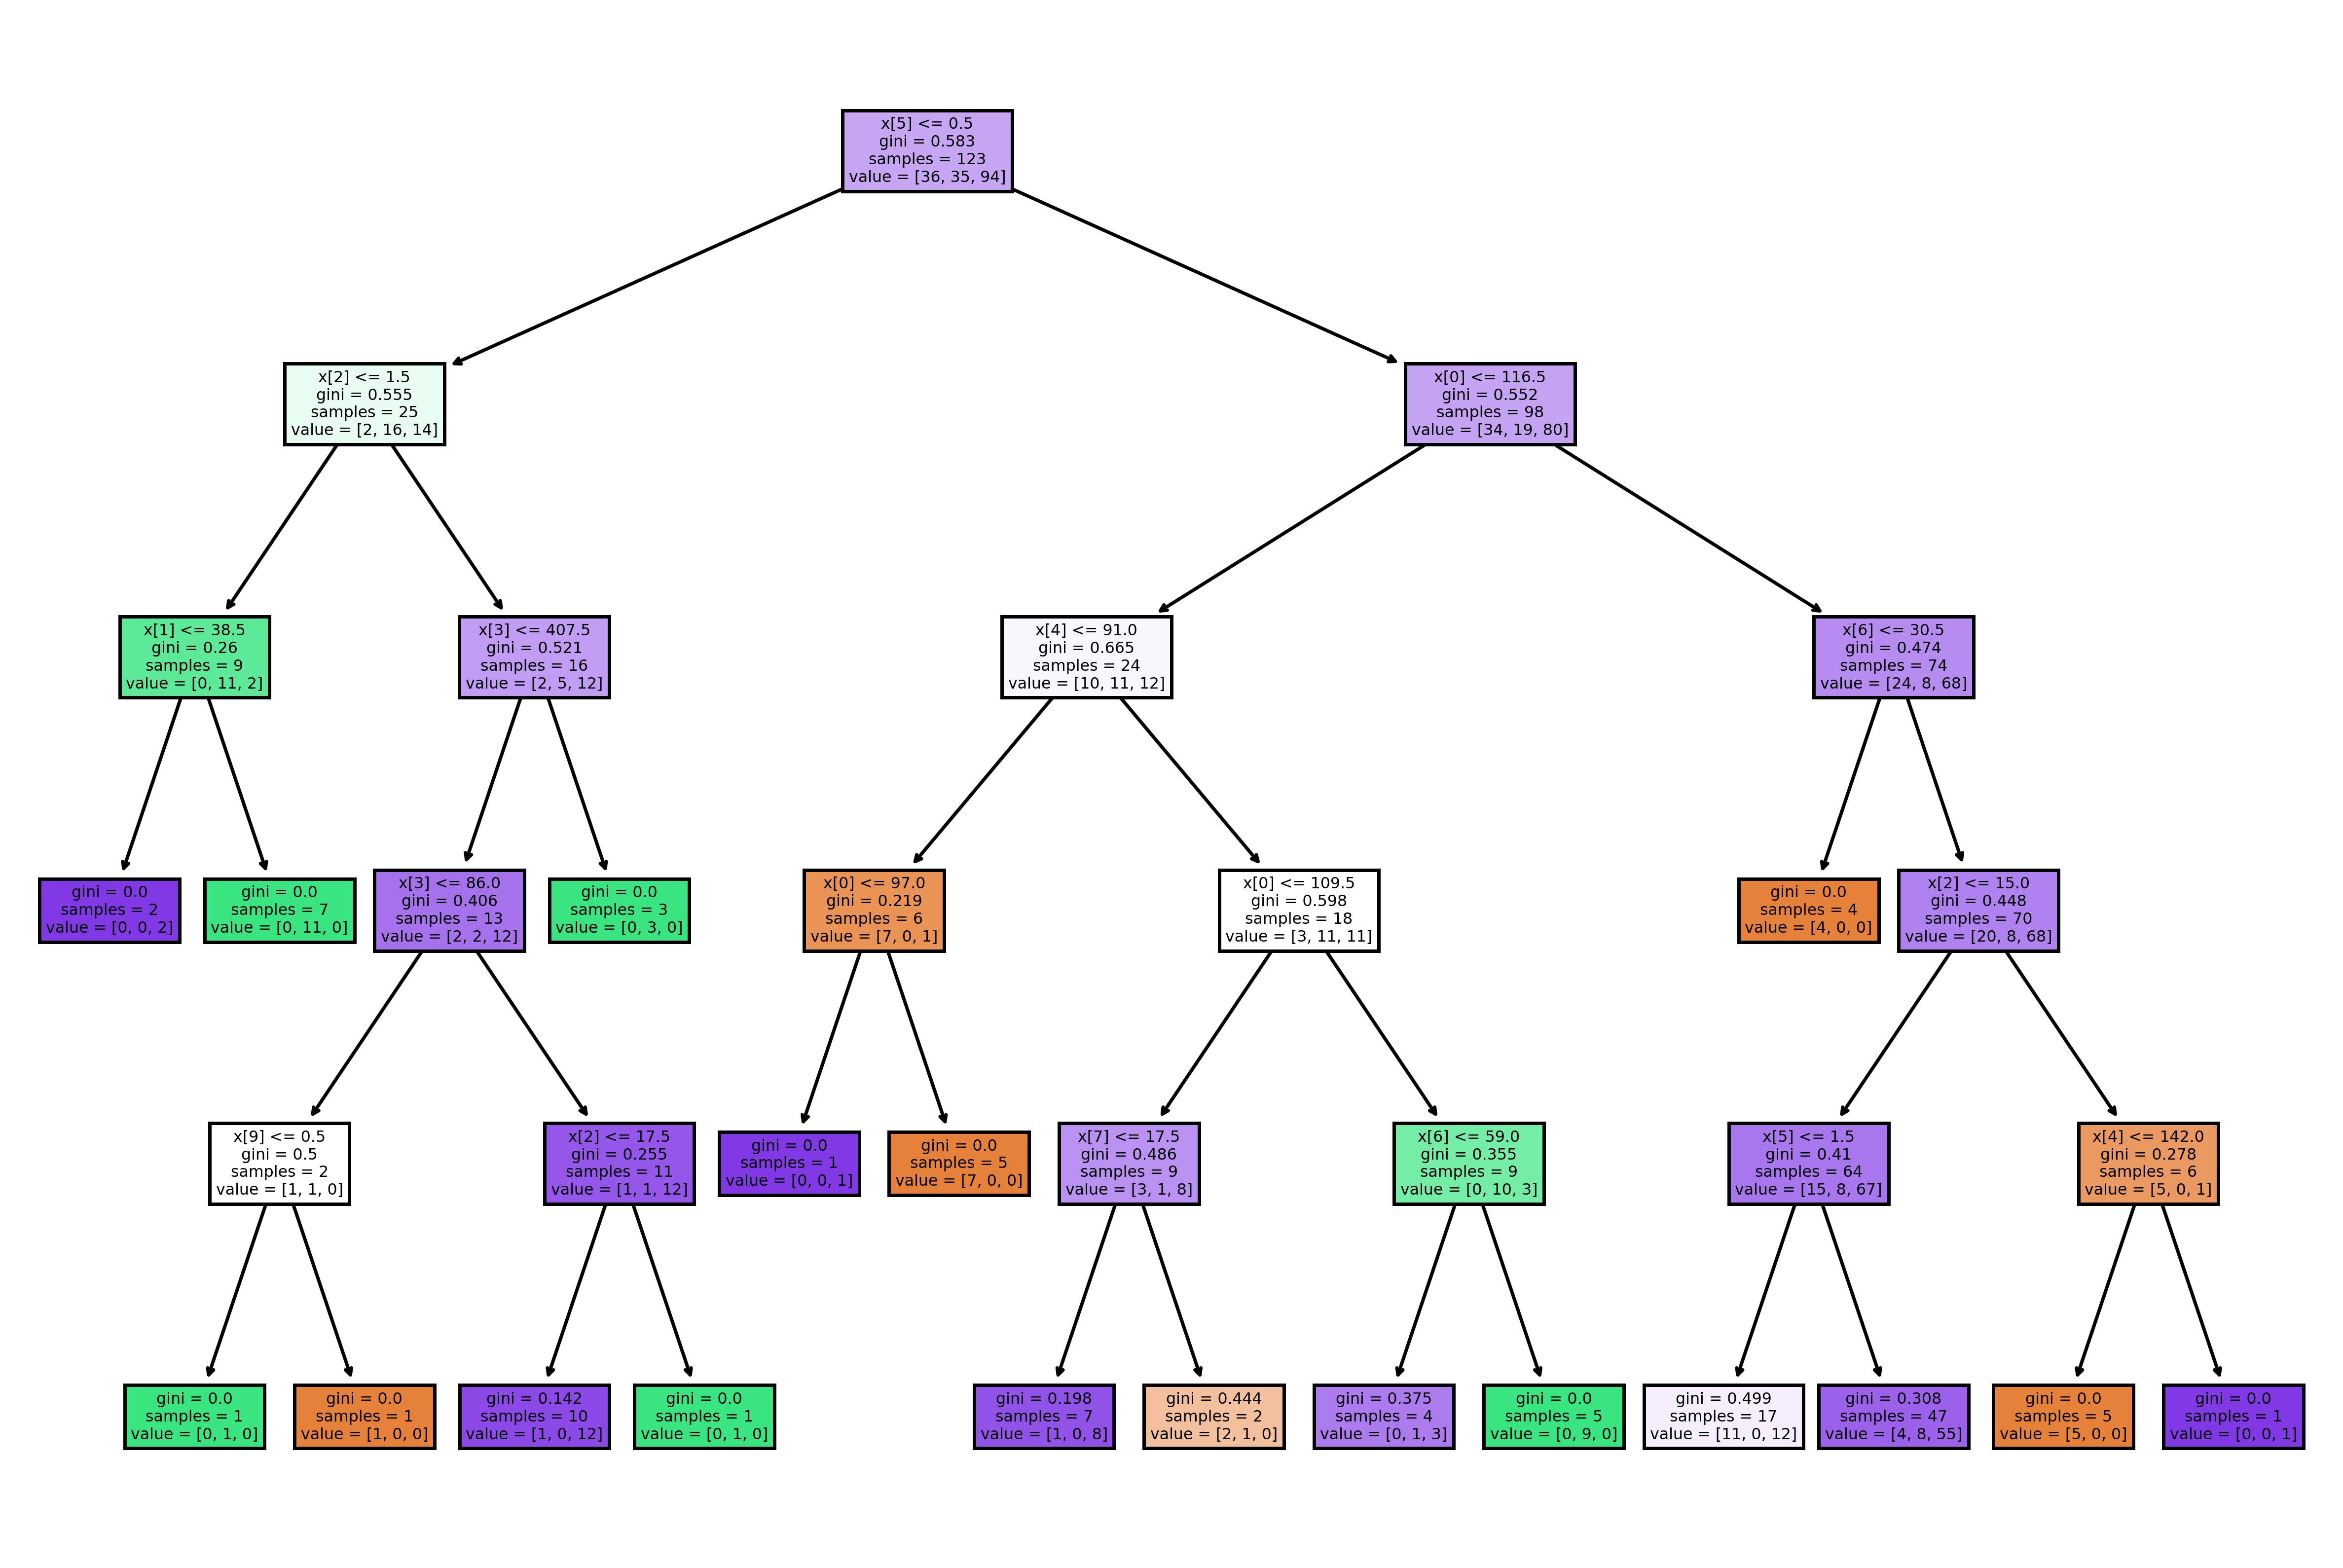

In [22]:
plt.figure(figsize=(12,8),dpi=500)
tree.plot_tree(RF.estimators_[190],filled=True)
plt.show()

In [23]:
RF.feature_importances_


array([0.11325125, 0.09788006, 0.09531782, 0.0980623 , 0.23063186,
       0.17167352, 0.12131426, 0.04266882, 0.0117385 , 0.0174616 ])